In [1]:
import numpy as np
import matplotlib
#matplotlib.use("pgf")
from shapes import *

#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [2]:
def generate_Npoint_shape_plot(N=10, res=100):
    coeffs = [] 
    coords = []
    coeffs.append(np.zeros((2,2*1+1)))
    coeffs.append(np.zeros((2,2*2+1)))
    coeffs.append(np.zeros((2,2*3+1)))
    coords.append(np.zeros((2,res)))
    coords.append(np.zeros((2,res)))
    coords.append(np.zeros((2,res)))
    np.random.seed(4)
    bad_shape =True
    while bad_shape == True:
        pos_r = np.random.uniform(0,0.5,(N))
        for M_  in range(3):
            M = M_ +1 
            #pos_thet = np.random.uniform(0,2*np.pi,(1,N))
            pos_thet =np.linspace(0,2*np.pi,num=N,endpoint=False)
            posx = pos_r*np.cos(pos_thet)
            posy = pos_r*np.sin(pos_thet)
            pos = np.row_stack((posx,posy))
            center = np.mean(pos,axis=1)
            r = pos - center[:,np.newaxis]
            r_mag  = np.sqrt(r[0,:]**2 + r[1,:]**2)
            x = np.zeros((2,np.shape(r)[1]))
            x[0,:] = 1
            costh =np.diag(np.matmul(r.T,x))#r.x
            costh = costh/r_mag
            theta = np.arccos(costh)
            ry = r[1,:]
            rx = r[0,:]
            neg = np.where(ry<0)
            theta[neg] = 2*np.pi - theta[neg]
            #print(r)
            #print(theta)
            rx = rx[np.argsort(theta)]
            ry = ry[np.argsort(theta)]
            theta = theta[np.argsort(theta)]
            #print(rx,ry)
            #print(theta)
            b = np.append(rx,ry)
            #print(np.shape(b))
            #M = 4
            m =  2*M+1
            A = np.zeros((N,m))
            A[:,0] = 1.0
            for j in range(1,M+1):
                A[:,2*j-1] = np.cos(j*theta)
                A[:,2*j]   = np.sin(j*theta)
            # Use the same A for both x and y coordinates.

            AA = np.matmul(A.T,A)
            #print("solving")
            #print(np.shape(AA))
            #print(np.shape(rx))
            coeffs_x = np.linalg.solve(AA,np.matmul(A.T,rx))
            coeffs_y = np.linalg.solve(AA,np.matmul(A.T,ry))
            coeffs[M_] = np.row_stack((coeffs_x,coeffs_y))
            #oeffs = scale_area(coeffs)
                #coeffs[:,2*mi-1,np.newaxis]*np.cos( mi*tt) + coeffs[:,2*mi,np.newaxis]*np.sin(mi*tt)
            #np.cos(M*theta)
            t = np.linspace(0, 2.0*np.pi, num=res, endpoint=True)
            dt = t[1]-t[0]
            coords[M_] = fourier2Cart(coeffs[M_],t)
            coords_prime = np.gradient(coords[M_],dt,axis=1)
            integrand = coords_prime[1,:] * coords[M_][0,:]
            area = np.trapz(integrand, x=t)
            self_intersection = check_self_intersection(coords[M_]) 
            scale = np.sqrt(0.5 / np.absolute(area))
            coeffs[M_] = scale * coeffs[M_]
            coords[M_] = fourier2Cart(coeffs[M_],t)
            domain_intersection = check_domain_intersection(coords[M_])
            #bad_shape = False
            bad_shape = self_intersection or domain_intersection

#    pl.figure(figsize=(8,4))
#    pl.subplot(121,projection='polar')
#    pl.plot(pos_thet,pos_r,'o')
#    pl.grid(True)
#    pl.subplot(122)
#    pl.axis('equal')
#     pl.xlim(-0.5,0.5)
#     pl.ylim(-0.5,0.5)
#     pl.plot(r[0,:],r[1,:],'o')
#     pl.plot(coords[0,:],coords[1,:],'r-')
       
    shape={"coeffs":coeffs,
           "coords":coords,
           "pos_r":pos_r}
    
    #pl.plot(coords[0,:],coords[1,:],'-')
    return shape
shape = generate_Npoint_shape_plot()

In [3]:
coordlist = shape["coords"]
pos_r = shape["pos_r"]

## Figure 1##

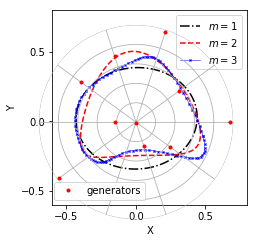

In [4]:
pagewidth=5.4 #inches
fig = pl.figure(figsize=(pagewidth/2.0,pagewidth/2.0))
#pl.figure()

pos_thet =np.linspace(0,2*np.pi,num=10,endpoint=False)
rect = [-1, -1, 1, 1]
rectp = [-1.07, -1.075, 1, 1]
# the carthesian axis:\n",                                                 
ax_cartesian  = fig.add_axes(rect)
# the polar axis:\n",                                                      
ax_polar = fig.add_axes(rectp, polar=True, frameon=False)
                           
# plotting the line on the carthesian axis\n",                             
#ax_cartesian.plot(r[0,:],r[1,:],'ro')\n",                                 
#ax_cartesian.plot(coords[0,:],coords[1,:],'k-')\n",                        
ax_cartesian.plot(coordlist[0][0,:], coordlist[0][1,:],'k-.',label=r'$m=1$')
ax_cartesian.plot(coordlist[1][0,:], coordlist[1][1,:],'r--',label=r'$m=2$')
ax_cartesian.plot(coordlist[2][0,:], coordlist[2][1,:],'b-x',label=r'$m=3$',linewidth=0.5,markersize=2)
ax_cartesian.legend(loc=0)
ax_cartesian.axis('equal')
ax_cartesian.locator_params(nbins=4)
ax_cartesian.set_xlim(-0.6,0.8)
ax_cartesian.set_ylim(-0.6,0.8)
ax_cartesian.set_xlabel('X')
ax_cartesian.set_ylabel('Y')
ax_polar.plot(pos_thet,pos_r*5,'ro',label='generators',markersize='3')
# the polar plot\n",                                                       
#ax_polar.plot(theta, r, color='r', linewidth=3)\n",                       
ax_polar.set_rmax(2.5)                                       
ax_polar.set_xticks(np.pi/180. * np.linspace(0,  360, 10, endpoint=False))
#ax_polar.set_xticklabels(['0',36,72,108,144,180,216,252,288,324],size=8,color='red')
ax_polar.set_xticklabels([],size=8,color='red')
ax_polar.legend(loc=(0.08,0.1))
ax_polar.set_yticklabels([])
ax_polar.grid(True)                                                

fig.savefig("shapes_sample.pdf", bbox_inches='tight',dpi=300) 
fig.savefig("shapes_sample.pgf", bbox_inches='tight',dpi=300) 

pl.show()

## Figure 2 ##

In [5]:
#permeability plots
shapelist =['JJJA75','JJJYU1','JJK1BM','JJK2QQ']
listdir = os.listdir('shapes_low0/coords')
listdir.sort()
print(len(listdir))
idd=[]
for i in shapelist:
    idd.append(listdir.index(i))
print(idd)
idd[3]=19846
idd[0] = 53780
shapelist[0] = listdir[idd[0]]
shapelist[3] = listdir[idd[3]]
print(shapelist)

99998
[54308, 54310, 54312, 54313]
['JCTPK5', 'JJJYU1', 'JJK1BM', '76F3XW']


('ref ', (0.0, 5e-10, 1e-09, 2e-09), ('0.0', '5e-10', '1e-9', '2e-9'))
./ref_shapes/simulations_dP_5e-10/xprof
./ref_shapes/simulations_dP_1e-9/xprof
./ref_shapes/simulations_dP_2e-9/xprof
('pref kref', array([ 0.00098131]), array([ 1.37956311]))
[0.0, 5e-10, 1e-09, 2e-09, 5e-09]
[  0.00000000e+00   1.40452933e-06   2.39980574e-06   3.92761799e-06
   2.00000000e+00]
(array([  0.00000000e+00,   1.40452933e-06,   2.39980574e-06,
         3.92761799e-06]), 'hello')
[0.0, 5e-10, 1e-09, 2e-09]
(array([  0.00000000e+00,   4.43932031e-07,   7.94261410e-07,
         1.36551352e-06]), 'hello')
[0.0, 5e-10, 1e-09, 2e-09]
(array([  0.00000000e+00,   3.44128947e-07,   6.34140545e-07,
         1.11295740e-06]), 'hello')
[0.0, 5e-10, 1e-09, 2e-09]
(array([  0.00000000e+00,   3.06945765e-10,   3.31998226e-10,
         1.08689670e-09]), 'hello')
[0.0, 5e-10, 1e-09, 2e-09]


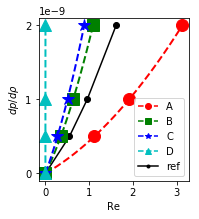

In [6]:
from matplotlib.lines import Line2D

def create_dummy_line(**kwds):
    return Line2D([], [], **kwds)
def plot_shapes(id,shapelist):
    # id is the list of the shape numbers 
    vel_mean = np.loadtxt('flow_mean_velocity',delimiter=' ')
    fit_data = np.loadtxt('fit_coeffs_order_2_4',delimiter=' ')
    DIR_ = glob.glob('./simulations_dP_*')
    ref_DIR = glob.glob('./ref_shape/simulations_dP_*')
    
    #####reference shape computations
    num_ref = len(ref_DIR)
    vel_ref_mean = np.zeros((num_ref+1, 1))
    vel_ref_mean[0] = 0.0
    dP_ref = [ ]
    dP_ref.append(float(0.0))
    dpstr_ref = [ ]
    dpstr_ref.append('0.0')
    for k, directory in enumerate(ref_DIR):
        dpstr_ref.append(directory.rsplit("_",1)[1])
        dP_ref.append(float(dpstr_ref[k+1]))
    dPref,dpstrref = zip(*sorted(zip(dP_ref,dpstr_ref)))
    
    print('ref ',dPref, dpstrref)
    for k in range(num_ref):
        temp = np.loadtxt('./ref_shape/simulations_dP_'+dpstrref[k+1]+'/xprof')        
        print('./ref_shapes/simulations_dP_'+dpstrref[k+1]+'/xprof')
        vel_ref_mean[k+1] = np.mean(temp[:,6])
        
    
    #Compute for reference shape
    x_ref = vel_ref_mean[0:4]
    y_ref = dPref[0:4]
    
    
    p_ref = (y_ref[2]-y_ref[1])/(x_ref[2]-x_ref[1])
    K_ref = 0.001/((y_ref[1]-y_ref[0])/(x_ref[1]-x_ref[0]))
    print("pref kref",p_ref, K_ref)
    #################
    #####
    dP_ref = np.array([0, 5e-10, 1e-9, 2e-9 ])
    dP_ = []
    dP_.append(float(0.0))
    dpstr_ = []
    dpstr_.append('0.0')
    for k, directory in enumerate(DIR_):
        dpstr_.append(directory.rsplit("_",1)[1])
        dP_.append((float(dpstr_[k+1])))
    dP= sorted(dP_)
    print(dP)
    print(vel_mean[id[0],:])
    pl.figure(figsize=(pagewidth/2.0,3))
    #pl.subplot(121)
    color = ['ro','gs','b*','c^','k.']
    line = ['r--','g--','b--','c--','k-']
    lines = [
    ('A', {'color': 'red', 'linestyle': '--', 'marker': 'o'}),
    ('B', {'color': 'green', 'linestyle': '--', 'marker': 's'}),
    ('C', {'color': 'b', 'linestyle': '--', 'marker': '*'}),
    ('D', {'color': 'c', 'linestyle': '--', 'marker': '^'}),
    ('ref',{'color': 'k', 'linestyle': '-', 'marker': '.'})]
    pl.plot(vel_ref_mean[0:7]*rho*L/mu,dPref[0:7],'ko-')
    #pl.plot(x_fit_ref*rho*L/mu,y_fit_ref,'k--',linewidth=2)
    for j in range(len(id)):
        print(vel_mean[id[j],0:4], "hello")
        print(dP[0:4])
        pl.plot(vel_mean[id[j],0:4]*rho*L/mu, dP[0:4], color[j],markersize=12,label='shape '+shapelist[j])
        #pl.plot(vel_mean[id[j],0:4], dP[0:4], color[j],markersize=12,label='shape '+str(j))
        x_data = np.linspace(vel_mean[id[j],0],vel_mean[id[j],3],25)
        y_fit = fit_data[id[j],0]*x_data**2 + fit_data[id[j],1]*x_data
        pl.plot(x_data*rho*L/mu,y_fit,line[j],linewidth=2)
        #pl.plot(x_data,y_fit,line[j],linewidth=2)
    pl.locator_params(nbins=4)
    pl.xlabel('Re')
    pl.ylabel(r'$dp/d\rho$')
    pl.legend([create_dummy_line(**l[1]) for l in lines],
    # Line titles
    [l[0] for l in lines], loc='lower right')
    pl.savefig("four_shapes_fit.pdf", bbox_inches='tight',dpi=300)
    pl.savefig("four_shapes_fit.pgf", bbox_inches='tight',dpi=300)
    


#ax.legend(
    # Line handles
#    [create_dummy_line(**l[1]) for l in lines],
    # Line titles
#    [l[0] for l in lines],
#    loc='center right'
#)    
    
plot_shapes(idd,shapelist)    


In [7]:
vel_mean = np.loadtxt('flow_mean_velocity',delimiter=' ')
print(np.argmin(vel_mean[:,1]))
vel = vel_mean[:,2]
lowval = (vel.argsort()[1])
print(lowval)
print(vel[lowval]*rho*L/mu)
print(listdir[lowval])
highval = vel.argsort()[-2]
print(highval)
print(listdir[highval])

87668
19846
0.000264896258739
76F3XW
53780
JCTPK5


## Figure 3 ##
Permeability statistics

(99998, 3) (99998, 3) (99998, 3)


/home/prapanch/Software/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


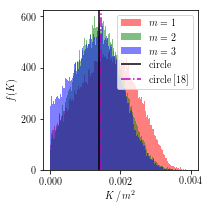

In [4]:
import numpy as np
#matplotlib.use("pgf")
from shapes import *

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

def gebart(phi,d=0):
    eps = phi
    if (d==0): #square configureation
        C= 4.0/(9.0*np.pi*np.sqrt(2.0))
        eps_C = 1.0-np.pi/4.0
    elif (d==1):
        C= 4/(9*np.pi*np.sqrt(6))
        eps_C = 1-np.pi/(2*np.sqrt(3))            
        
    K =  C*(np.sqrt(((1-eps_C)/(1-eps)) -1))**(5/2)
    return K

def Bruschke(phi,d=0):
    eps = phi
    l = np.sqrt((4/np.pi)*(1-eps))
     
    K =  ((1-l**2)**2/(12*l**3))*1/(3*l*(np.arctan(np.sqrt((1+l)/(1-l))))/(1-l**2) +l**2/2 +1)
    return K
def drummond(eps,d=0):
    phi = 1.0-eps
    if (d==0): #square configureation
        K = (1/(32.0*phi)) *(np.log(1.0/phi) - 1.476 + (2.0*phi -0.796*phi**2)/(1.0+0.489*phi -1.605*phi**2))
    elif (d==1):
        K = (1/(32*phi)) *(np.log(1/phi) - 1.497 + 2*phi - (phi**2)/(2) -0.739*phi**4 + (2.534*phi**5)/(1+1.2758*phi))
       
    return K

#luding = np.loadtxt('luding.csv',delimiter='  ',usecols=range(2))
#print(luding)
phi = np.linspace(0.25,0.95,20)
#print(gebart(phi,0))
#pl.semilogy(phi, gebart(phi,0),'r-',label="Gebart(1992)")
#pl.semilogy(phi, Bruschke(phi,1),'b-',label="Bruschke et. al. (1993)")
#pl.semilogy(phi, drummond(phi,0),'k-',label="Drummond et. al. (1984)")
#pl.semilogy(luding[:,0],luding[:,1],'bs',markersize=8,label="Yazdchi et. al. (2011)")
#pl.xlabel(r'$\epsilon$',fontsize=24)
#pl.ylabel(r'$K/d^2$',fontsize=24)
#pl.legend(loc="lower right")
#pl.show()
#pl.savefig("Luding.jpg",dpi=300)


vol_frac = 0.5
radius_cyl = np.sqrt(vol_frac/np.pi)
rho = 1000
mu = 0.001
L = 2.0*radius_cyl 

#Perm_fit = np.loadtxt('./fit_coeffs_order_2_6', delimiter=' ')

#Perm_darcy = mu/Perm_fit[:,1] # viscous (intrinsic permeability) k 
#Darcy =  (Perm_darcy/L**2)*mu/(radius_cyl)
#pl.figure()

y_gebart = Bruschke(0.5,0)
y_drummond_K  = y_gebart * (L**2)#*radius_cyl/mu
y_gebart = gebart(0.5,0) # this is k/d^2
y_gebart_K  = y_gebart * (L**2)#*radius_cyl/mu
#y_drummond = drummond(0.5)
#pl.plot(Darcy, 'r.',label='Random shapes')
#pl.axhline(y_gebart,0,1,c='g',ls='-',label='Gebart(1992)')
#pref [  1.47252481e+02   6.77322378e-04   0.00000000e+00]
#([  1.04771733e+02,   8.52815691e-04,   0.00000000e+00])
# [  8.66454140e+01   9.95954987e-04   0.00000000e+00]
#8 [  1.28000579e+01   2.06941056e-03   0.00000000e+00]
#p_circle_reference = np.array([  1.28000579e+01, 2.06941056e-03, 0.00000000e+00])
#p_circle = 0.00120624
#p_circle =mu/p_circle
#print(p_circle)
#p_circle = (p_circle/L**2)*mu/radius_cyl
#pl.axhline(p_circle,0,1,c='k',ls='--',label='Circle')
#pl.xlabel(r'$i$',fontsize=24)
#pl.ylabel(r'$K/d^2$',fontsize=24)
#pl.legend()
#pl.ylim(0,0.015)
#pl.xlim(0,11110)
#pl.title(r'$\epsilon = 0.5$')
#pl.savefig("gebart_compare.jpg",bbox_inches='tight',dpi=300)
#pl.show()
pagewidth=6 #inches



m1_fit  = np.loadtxt('m=1/fit_coeffs_order_2_4',delimiter=' ')
m2_fit  = np.loadtxt('fit_coeffs_order_2_4',delimiter=' ')
m3_fit  = np.loadtxt('m=3/fit_coeffs_order_2_4',delimiter=' ')
print(np.shape(m1_fit),np.shape(m2_fit), np.shape(m3_fit))
mu = 0.001
rho = 1000
prefactor = mu/rho
K1 = prefactor/m1_fit[:,1]
K2 = prefactor/m2_fit[:,1]
K3 = prefactor/m3_fit[:,1]

K_ref=1.37956/rho
pl.figure(figsize=(pagewidth/2.0,3.0))
pl.locator_params(nbins=4)
kwargs = dict(alpha=0.5, bins=25, density=True, stacked=True)
pl.vlines(K_ref,0,800,'k',label=r"circle")
#pl.vlines(y_gebart_K,0,600,'m',linestyles='dashed',label=r"ref1")
pl.vlines(y_drummond_K,0,800,'m',linestyles='dashdot',label=r"circle\,[18]")
pl.hist(K1,alpha=0.5, bins=250, range=(0,0.004),normed=True,stacked=True ,color= 'r',label=r"$m=1$")
pl.hist(K2,alpha=0.5, bins=250, range=(0,0.004),normed=True,  stacked=True , color='g',label=r"$m=2$")
pl.hist(K3,alpha=0.5, bins=250, range=(0,0.004),normed=True,  stacked=True , color='b',label=r"$m=3$")
pl.ylim(0,625)
pl.legend()
pl.xlabel('$K\,/\,m^2$')
pl.ylabel('$f(K)$')
pl.tight_layout()
pl.savefig("permeability_distribution.pgf")
pl.savefig("permeability_distribution.pdf")
pl.show()